# MNIST

In [1]:
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X, y = mnist.data, mnist.target

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
X.shape

(70000, 784)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

In [11]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

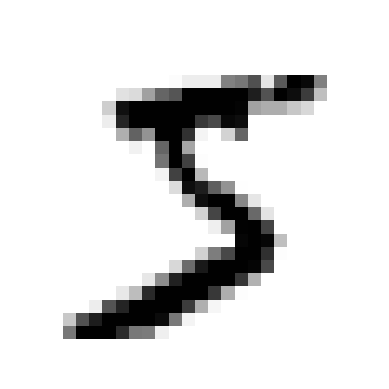

In [12]:
plot_digit(X[0])
plt.show()

In [13]:
y[0]

'5'

In [14]:
X_train, X_test, y_train, y_test = X[:6000], X[:1000], y[:6000], y[:1000]

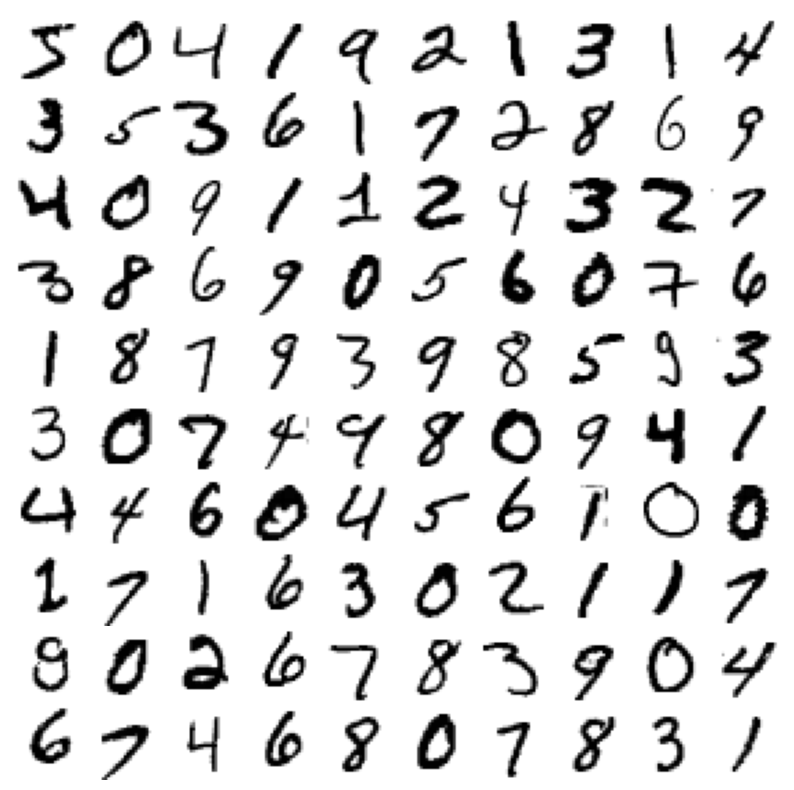

In [15]:
plt.figure(figsize = (10, 10))
for i, image in enumerate(X[:100]):
    plt.subplot(10, 10, i + 1)
    plot_digit(image)
plt.subplots_adjust(wspace= 0, hspace = 0)
save_fig("digits", tight_layout=False)
plt.show()

## Training Binary Classifier

In [16]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([X[0]])

array([ True])

## Performance Measures

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.962 , 0.956 , 0.9665])

In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [21]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.914 , 0.9145, 0.9145])

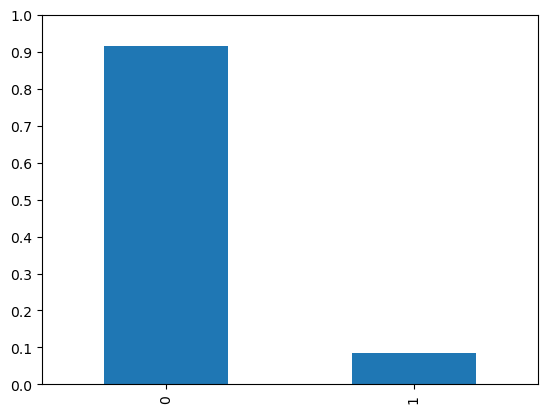

In [22]:
# Extra code - visualization desbalanced data
import pandas as pd
import numpy as np
y_train_5_df = pd.DataFrame(y_train_5.astype(int))
fq = y_train_5_df.iloc[:,0].value_counts()
fq.replace(fq.values, fq.values / sum(fq.values), inplace= True)
fq.plot(kind = 'bar')
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel(None)
plt.show()

In [23]:
del y_train_5_df, fq

### Implementing Cross-Validation

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) # add shuffle=True if the dataset is
                                        # not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_sgd = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_5_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_5_folds = y_train_5[test_index]

    clone_sgd.fit(X_train_folds, y_train_5_folds)
    y_pred = clone_sgd.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_5_folds)
    print(n_correct / len(y_test_5_folds))

0.962
0.956
0.9665


### Cross-Validation Predict

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [27]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[5486,    0],
       [   0,  514]], dtype=int64)

### Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7801980198019802

In [29]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.7801980198019802

In [30]:
recall_score(y_train_5, y_train_pred)

0.7665369649805448

In [31]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.7665369649805448

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7733071638861629

In [33]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7733071638861629

### Precision / Recall trade-off

In [34]:
y_scores = sgd_clf.decision_function([X[0]])
y_scores

array([38042.34312442])

In [35]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
threshold = 40000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, 
                             method = "decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

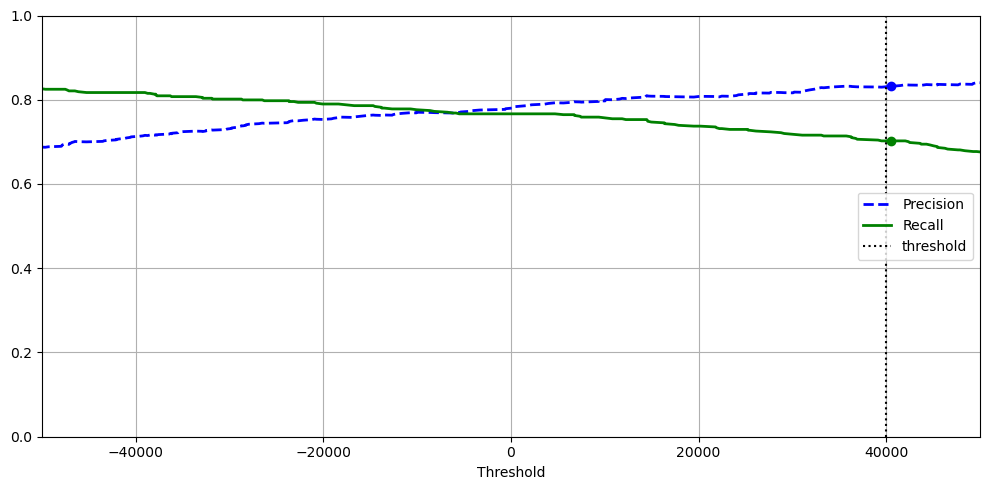

In [39]:
plt.figure(figsize = (10, 5))
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label = "threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

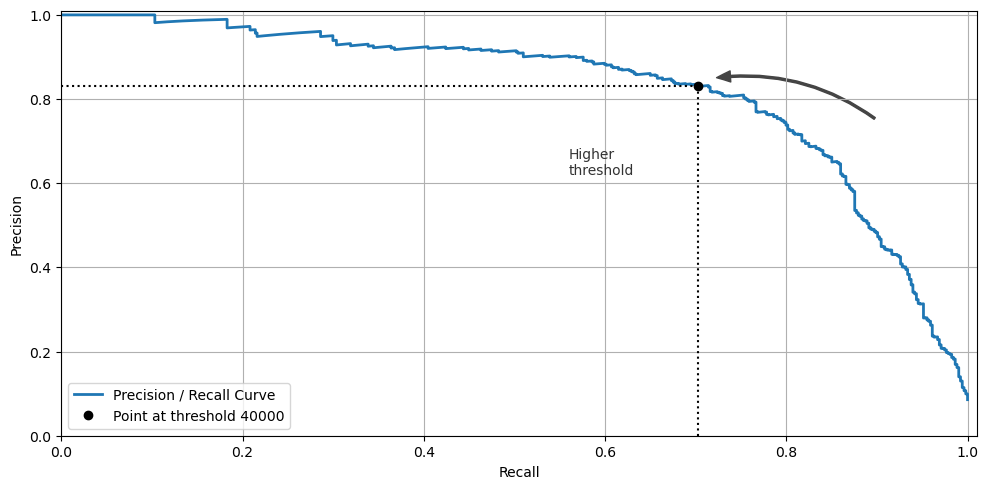

In [40]:
import matplotlib.patches as patches

plt.figure(figsize = (10, 5))
plt.plot(recalls, precisions, linewidth = 2, label = "Precision / Recall Curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label= f"Point at threshold {threshold}")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.90, 0.75), (0.72, 0.85),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [41]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

105660.23702487054

In [42]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9012345679012346

In [44]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.5680933852140078

### The ROC Curve

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [46]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

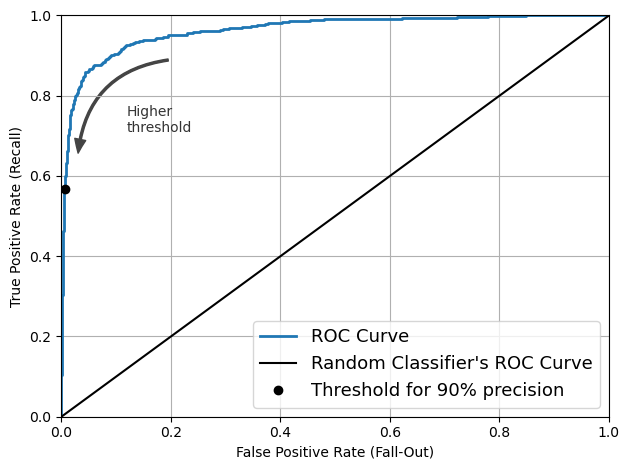

In [47]:
plt.plot(fpr, tpr, linewidth = 2, label = "ROC Curve")
plt.plot([0, 1], [0, 1], 'k', label = "Random Classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90], "ko", label = "Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.03, 0.65),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9641599203348885

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, 
                             method = "predict_proba")

In [51]:
y_probas_forest[:2]

array([[0.37, 0.63],
       [0.98, 0.02]])

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [52]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

93.9%


In [53]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

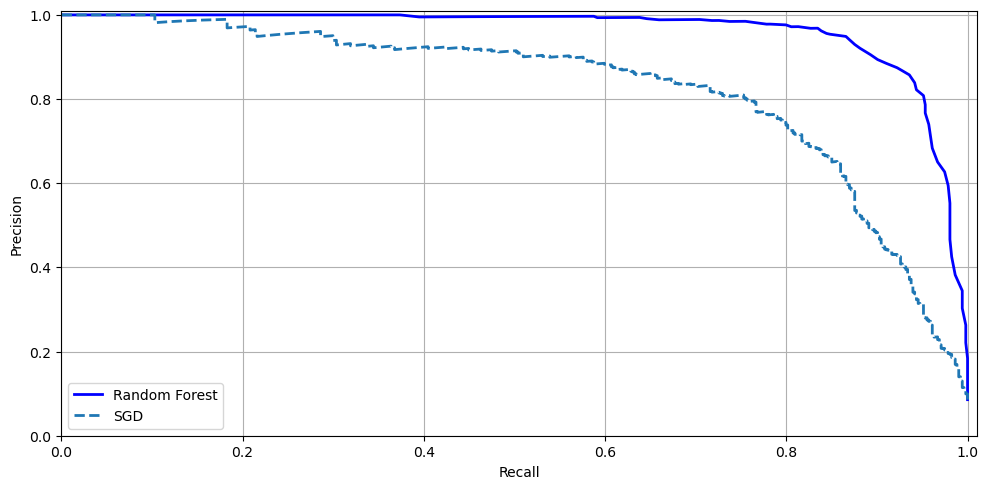

In [54]:
plt.figure(figsize = (10, 5))
plt.plot(recalls_forest, precisions_forest, "b", linewidth = 2, label = "Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.legend(loc = "lower left")
plt.grid()
save_fig("pr_curve_comparison_plot")

plt.show()

In [55]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  #positive proba >= 50%
f1_score(y_train_5, y_train_pred_forest)

0.8105625717566016

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9936162229715256

In [57]:
precision_score(y_train_5, y_train_pred_forest)

0.988795518207283

In [58]:
recall_score(y_train_5, y_train_pred_forest)

0.6867704280155642

## Multiclass Classification

In [59]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [60]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [61]:
some_digit_scores = svm_clf.decision_function([X[0]])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [62]:
class_id = some_digit_scores.argmax()
class_id

5

In [63]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [64]:
svm_clf.classes_[class_id]

'5'

In [65]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [66]:
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [67]:
len(ovr_clf.estimators_)

10

In [68]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [69]:
sgd_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [70]:
sgd_clf.decision_function([X[0]]).round()

array([[-735712., -857058., -281086.,    8290., -616793.,   29040.,
        -492305., -834395., -318385., -363474.]])

In [71]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8565, 0.8715, 0.8635])

In [72]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8705, 0.8985, 0.8925])

## Error Analysis

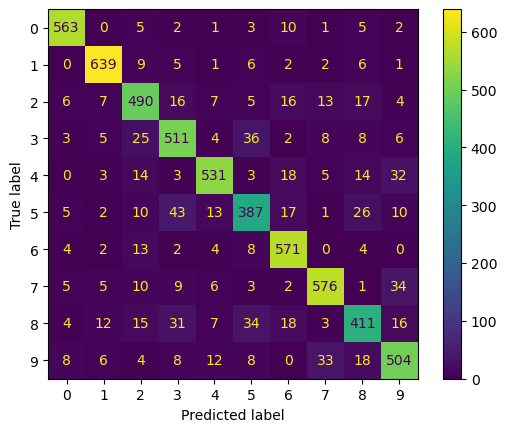

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

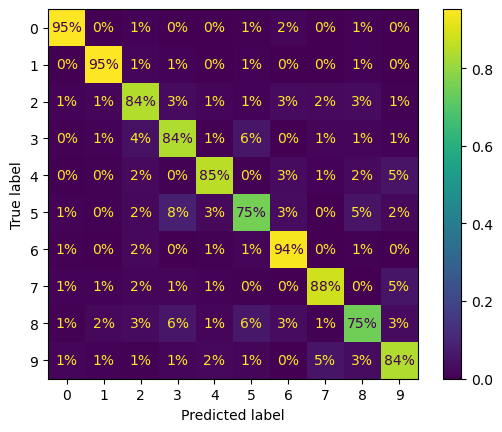

In [74]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format = ".0%")
plt.show()

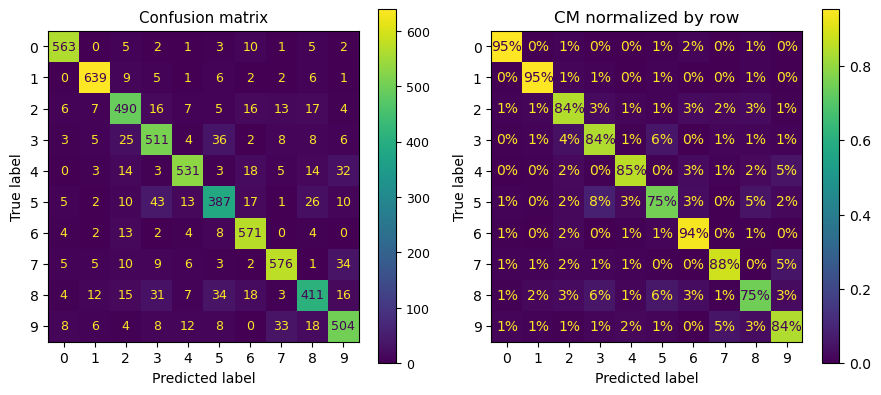

In [75]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

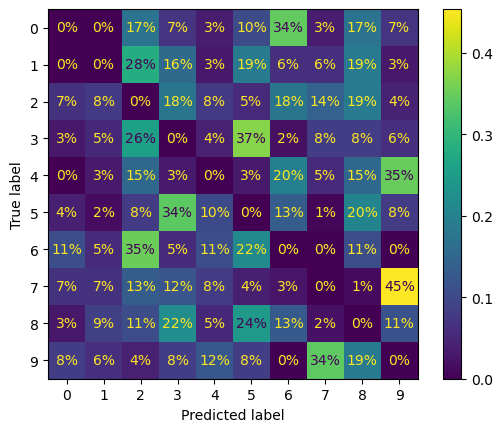

In [76]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                                        sample_weight = sample_weight,
                                        normalize = "true", 
                                        values_format = ".0%")
plt.show()

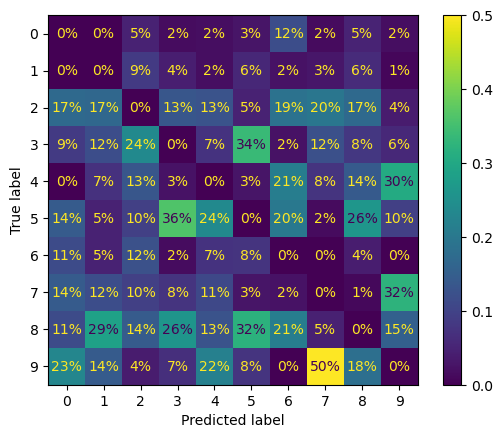

In [77]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize = "pred", values_format = ".0%")
plt.show()

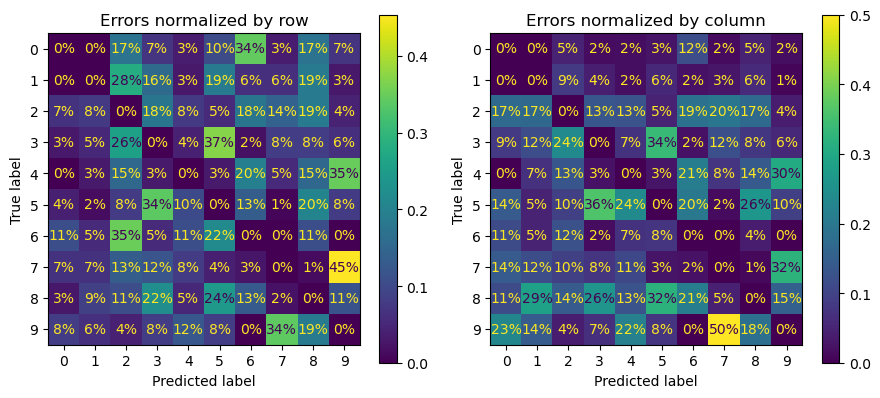

In [78]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

In [79]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

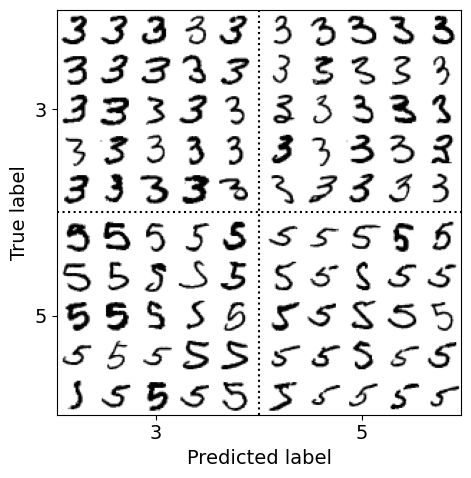

In [80]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

## Multilabel Classification

In [81]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [82]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [83]:
knn_clf.predict([X[0]])

array([[False,  True]])

In [84]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.9500922726736858

In [85]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9529944300252725

In [86]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [87]:
chain_clf.predict([X[0]])

array([[0., 1.]])

## Multioutput Classification

In [88]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise 
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

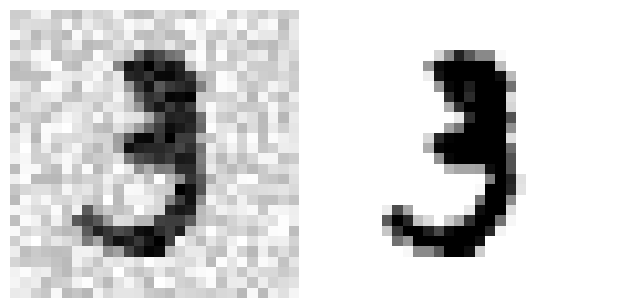

In [89]:
plt.subplot(121); plot_digit(X_test_mod[10])
plt.subplot(122); plot_digit(y_test_mod[10])
save_fig("noisy_digit_example_plot")
plt.show()

In [90]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

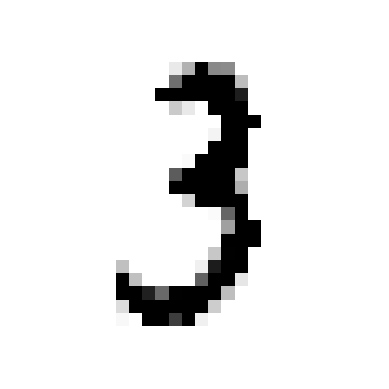

In [91]:
clean_digit = knn_clf.predict([X_test_mod[10]])
plot_digit(clean_digit)
plt.show()

# Exercises

1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [92]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.954

In [93]:
grid_params = [
    { 'weights' : ["uniform", "distance"], 'n_neighbors' : [3, 4, 5, 7, 9]}
]

In [94]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid = grid_params,
                           cv = 3,
                           scoring = "accuracy")

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [95]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [96]:
grid_search.best_score_

0.9326666666666666

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)

1.0

In [210]:
tuned_accuracy = grid_search.best_estimator_.score(X_test, y_test)
tuned_accuracy

1.0

## 2. Data Augmentation

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [163]:
def shift_image(image : np.ndarray, dir : str, n_pixels = 1):
    img = image.reshape(28, 28).copy()
    rows, cols = img.shape
    if dir == "left":
        img = np.delete(img, [col for col in range(n_pixels)] ,axis = 1)
        img = np.concatenate((img, np.zeros((rows, n_pixels))), axis = 1)
    elif dir == "right":
        img = np.delete(img, [cols - (1 + col) for col in range(n_pixels)], axis = 1)
        img = np.concatenate((np.zeros((rows, n_pixels)), img), axis = 1)
    elif dir == "up":
        img = np.delete(img, [row for row in range(n_pixels)], axis = 0)
        img = np.concatenate((img, np.zeros((n_pixels, cols))), axis = 0)
    elif dir == "down":
        img = np.delete(img, [rows - (1 + row) for row in range(n_pixels)], axis = 0)
        img = np.concatenate((np.zeros((n_pixels, cols)), img), axis = 0)
    else: 
        raise ValueError("Choose a correct direction!")
    return img

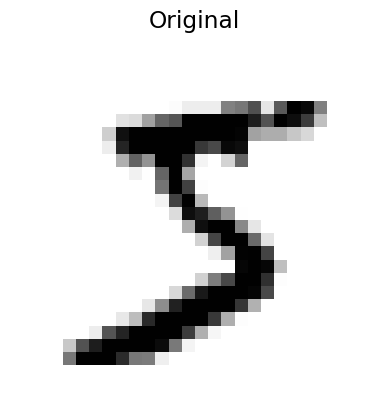

In [164]:
selected_image = X[0]
plot_digit(selected_image)
plt.title("Original")
plt.show()

In [165]:
image_left, image_right= shift_image(X[0], "left"), shift_image(X[0], "right")
image_up, image_down = shift_image(X[0], "up"), shift_image(X[0], "down")

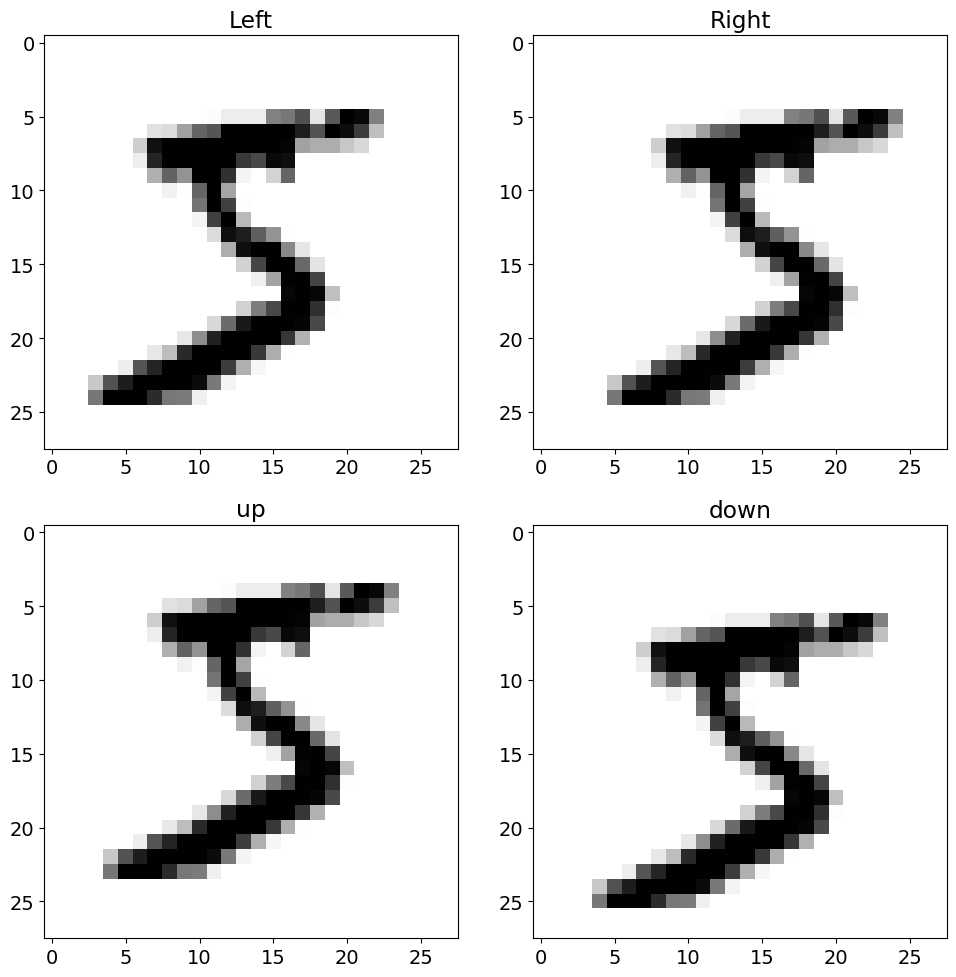

In [173]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

axs[0, 0].imshow(image_left, cmap = 'binary')
axs[0, 0].set_title("Left")
# axs[0, 0].axis('off')

axs[0, 1].imshow(image_right, cmap = 'binary')
axs[0, 1].set_title("Right")
# axs[0, 1].axis('off')

axs[1, 0].imshow(image_up, cmap = 'binary')
axs[1, 0].set_title("up")
# axs[1, 0].axis('off')

axs[1, 1].imshow(image_down, cmap = 'binary')
axs[1, 1].set_title("down")
# axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [174]:
direction = ["left", "right", "up", "down"]

In [204]:
X_train_augmented = np.array([shift_image(img, dir).reshape(784,) for img in X_train for dir in direction])
y_train_augmented = np.array([label for label in y_train for _ in direction])

In [205]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [208]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [223]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.996

In [228]:
error_rate_change = (1 - tuned_accuracy) / (1 - augmented_accuracy) - 1
error_rate_change

-1.0

## 3. Trackle the Titanic dataset

A great place to start is on Kaggle. Alternatively, you can download the data from `https://homl.info/titanic.tgz` and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files, train.csv and test.csv, which you can load using `pandas.read_csv()`. The goal is to train a classifier that can predict the Survived column based on the other columns

### Extract data

In [237]:
from dotenv import load_dotenv
import tarfile
import os

load_dotenv("../../.env")

dir = os.getenv("DATA_DIRECTORY_CH3")
tgz_path = os.path.join(dir, "titanic.tgz")
extract_to_directory = os.path.join(dir)

with tarfile.open(tgz_path) as tar_ref:
    tar_ref.extractall(extract_to_directory)

### Import Libraries

In [328]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

### Configure

In [ ]:
from sklearn._config import set_config

set_config(display = "diagram")

### Load DATA

In [250]:
titanic = pd.read_csv(os.path.join(dir, "titanic/train.csv"))
titanic_test = pd.read_csv(os.path.join(dir, "titanic/test.csv"))

### EDA

The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [252]:
titanic.set_index("PassengerId", inplace = True)
titanic_test.set_index("PassengerId", inplace = True)

#### Inspect Data

In [253]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
null_attributes = titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [267]:
null_attributes = titanic.isnull().sum()

In [269]:
null_percentages = (null_attributes / len(titanic)) * 100
null_percentages

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [258]:
titanic.index.duplicated().sum()

0

In [262]:
titanic[titanic["Sex"] == "female"]["Age"].mean()

27.915708812260537

In [263]:
titanic[titanic["Sex"] == "male"]["Age"].mean()

30.726637306843266

In [273]:
titanic["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [277]:
for column_clf in titanic.select_dtypes(include = object).columns:
    print(f"{column_clf.ljust(8)} : {len(titanic[column_clf].unique())}")

Name     : 891
Sex      : 2
Ticket   : 681
Cabin    : 148
Embarked : 4


#### Descriptive Analysis

In [259]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0000,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0000,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699113,14.526507,0.4167,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0000,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0000,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0000,7.9104,14.4542,31.0,512.3292


- Only 38% survived.
- The mean age was less than 30 years old.

In [260]:
titanic.describe(include = object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


#### Clean Data

In [332]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace = True)

In [333]:
for embarked in titanic["Embarked"].unique():
    print(f"{embarked} : {titanic[titanic['Embarked'] == embarked]['Age'].std()}")

S : 14.18960828741078
C : 15.43491000854179
Q : 16.915395995752558


In [334]:
for pclass in titanic["Pclass"].unique():
    print(f"{pclass} : {titanic[titanic['Pclass'] == pclass]['Age'].std()}")

3 : 12.495416654702204
1 : 14.802900862055417
2 : 14.001037233705459


In [324]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    StandardScaler()
)

In [326]:
cat_pipeline = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(sparse_output = False)
)

In [330]:
preprocessing = make_column_transformer(
    (num_pipeline, ['Age', 'SibSp', 'Parch', 'Fare']),
    (cat_pipeline, ['Pclass', 'Sex', 'Embarked'])
)

In [341]:
X_train = preprocessing.fit_transform(titanic)
X_train.shape

(891, 12)

In [344]:
X_test = preprocessing.transform(titanic_test)
X_test.shape

(418, 12)

In [342]:
y_train = titanic["Survived"]

#### Model

In [343]:
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [348]:
y_pred = forest_clf.predict(X_test)

In [349]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.8137578027465668

In [350]:
svm_clf = SVC(gamma = "auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 10)
svm_scores.mean()

0.8249313358302123

C:\Users\HP\AppData\Local\Temp\ipykernel_11784\1279163153.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([forest_scores, svm_scores], labels = ("Random Forest", "SVM"))


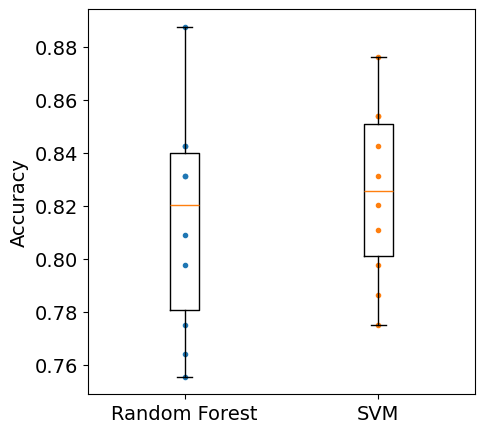

In [365]:
plt.figure(figsize = (5, 5))
plt.plot([1] * 10, forest_scores, '.')
plt.plot([2] * 10, svm_scores, '.')
plt.boxplot([forest_scores, svm_scores], labels = ("Random Forest", "SVM"))
plt.ylabel("Accuracy")
plt.show()

The random forest classifier got a very high score on one of the 10 folds, but overall it had a lower mean score, as well as a bigger spread, so it looks like the SVM classifier is more likely to generalize well.

#### Feature Engineering

To improve this result further, you could:
* Compare many more models and tune hyperparameters using cross validation and grid search,
* Do more feature engineering, for example:
  * Try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).
  * Replace **SibSp** and **Parch** with their sum.
  * Try to identify parts of names that correlate well with the **Survived** attribute.
  * Use the **Cabin** column, for example take its first letter and treat it as a categorical attribute.

In [402]:
titanic["Age"].fillna(titanic["Age"].median(), inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11784\605523025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace = True)


In [403]:
titanic["AgeBucket"] = titanic["Age"] // 15 * 15

In [404]:
titanic[["AgeBucket", "Survived"]].groupby("AgeBucket").mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.337474
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [371]:
titanic["RelativesOnBoard"] = titanic["SibSp"] + titanic["Parch"]

In [372]:
titanic[["RelativesOnBoard", "Survived"]].groupby("RelativesOnBoard").mean()

,Survived
RelativesOnBoard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [384]:
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0], inplace = True)

In [388]:
titanic['CabinGroup'] = titanic['Cabin'].apply(lambda x: x[0])

In [390]:
titanic[['CabinGroup', 'Survived']].groupby('CabinGroup').mean()

,Survived
CabinGroup,
A,0.466667
B,0.328338
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [392]:
titanic[['AgeBucket', 'Survived', 'Sex']].groupby(["AgeBucket", "Sex"]).mean()

Survived
AgeBucket Sex             
0.0       female  0.615385
          male    0.538462
15.0      female  0.750000
          male    0.151515
30.0      female  0.807692
          male    0.204380
45.0      female  0.781250
          male    0.192982
60.0      female  1.000000
          male    0.095238
75.0      male    1.000000

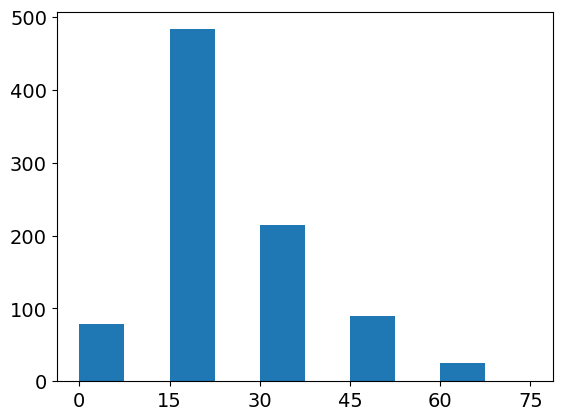

In [408]:
titanic['AgeBucket'].hist(grid = False)
plt.xticks(sorted(titanic['AgeBucket'].unique()))
plt.show()

## 4. Build a Spam Classifier

**a.** Download examples of spam and ham from Apache SpamAssassin’s public datasets.

**b.** Unzip the datasets and familiarize yourself with the data format.

**c.** Split the data into a training set and a test set.

**d.** Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello”, “how”, “are”, “you”, then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word. You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL”, replace all numbers with “NUMBER”, or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

**e.** Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

### Extract Data

In [414]:
import requests

base_url = "https://spamassassin.apache.org/old/publiccorpus/"

files = [
    # "20021010_easy_ham.tar.bz2",
    # "20021010_hard_ham.tar.bz2",
    # "20021010_spam.tar.bz2",
    "20030228_easy_ham.tar.bz2",
    # "20030228_easy_ham_2.tar.bz2",
    # "20030228_hard_ham.tar.bz2",
    "20030228_spam.tar.bz2",
    # "20050311_spam_2.tar.bz2",
]

download_dir = os.path.join(os.getenv("DATA_DIRECTORY_CH3"), "spamassassin_corpus")
os.makedirs(download_dir, exist_ok=True)

def download_and_extract(file_name):
    file_url = base_url + file_name
    file_path = os.path.join(download_dir, file_name)
    
    print(f"Descargando {file_name}...")
    response = requests.get(file_url, stream=True)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
        print(f"{file_name} descargado con éxito.")
        
        print(f"Extrayendo {file_name}...")

        with tarfile.open(file_path, "r:bz2") as tar:
            tar.extractall(path=download_dir)
        print(f"{file_name} extraído con éxito.")
        
        os.remove(file_path)
    else:
        print(f"Error al descargar {file_name}: {response.status_code}")

In [415]:
for file in files: download_and_extract(file)

Descargando 20030228_easy_ham.tar.bz2...
20030228_easy_ham.tar.bz2 descargado con éxito.
Extrayendo 20030228_easy_ham.tar.bz2...
20030228_easy_ham.tar.bz2 extraído con éxito.
Descargando 20030228_spam.tar.bz2...
20030228_spam.tar.bz2 descargado con éxito.
Extrayendo 20030228_spam.tar.bz2...
20030228_spam.tar.bz2 extraído con éxito.


### Read Dataset

In [422]:
ham_dir, spam_dir = Path(download_dir).iterdir()

In [431]:
ham_files = [ham_file for ham_file in ham_dir.iterdir() if len(ham_file.name) > 10]
spam_files = [spam_file for spam_file in spam_dir.iterdir() if len(spam_file.name) > 10]

In [432]:
len(ham_files)

2500

In [433]:
len(spam_files)

500

In [434]:
import email
import email.policy

def load_email(filepath):
    with open(filepath, 'rb') as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)

In [435]:
ham_email = [load_email(ham_file) for ham_file in ham_files]
spam_email = [load_email(spam_file) for spam_file in spam_files]

In [448]:
print(ham_email[0].get_content().strip())

Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 

In [450]:
print(spam_email[3].get_content().strip())

##################################################
#                                                #
#                 Adult Club                     #
#           Offers FREE Membership               #
#                                                #
##################################################

>>>>>  INSTANT ACCESS TO ALL SITES NOW
>>>>>  Your User Name And Password is.
>>>>>  User Name: zzzz@spamassassin.taint.org
>>>>>  Password: 760382

5 of the Best Adult Sites on the Internet for FREE!
---------------------------------------
NEWS 08/18/02
With just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New
Members. Are you one of them yet???
---------------------------------------
Our Membership FAQ

Q. Why are you offering free access to 5 adult membership sites for free?
A. I have advertisers that pay me for ad space so you don't have to pay for membership.

Q. Is it true my membership is for life?
A. Absolutely you'll never have to pay a cen

Some emails are actually multipart, with images and attachments (which can have their own attachments). Let's look at the various types of structures we have:

In [492]:
def get_email_structure(email : email.message.EmailMessage):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        multipart = ", ".join([get_email_structure(sub_email) for sub_email in payload])
        return f"multipart({multipart})"
    return email.get_content_type()

In [493]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        content_type = get_email_structure(email)
        structures[content_type] += 1
    return structures

In [494]:
structures_counter(ham_email)

Counter({'text/plain': 2408,
         'multipart(text/plain, application/pgp-signature)': 66,
         'multipart(text/plain, text/html)': 8,
         'multipart(text/plain, text/plain)': 4,
         'multipart(text/plain)': 3,
         'multipart(text/plain, application/octet-stream)': 2,
         'multipart(text/plain, text/enriched)': 1,
         'multipart(text/plain, application/ms-tnef, text/plain)': 1,
         'multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)': 1,
         'multipart(text/plain, video/mng)': 1,
         'multipart(text/plain, multipart(text/plain))': 1,
         'multipart(text/plain, application/x-pkcs7-signature)': 1,
         'multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)': 1,
         'multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))': 1,
         'multipart(text/plain, application/x-java-applet)': 1})

In [495]:
structures_counter(spam_email)

Counter({'text/plain': 218,
         'text/html': 183,
         'multipart(text/plain, text/html)': 45,
         'multipart(text/html)': 20,
         'multipart(text/plain)': 19,
         'multipart(multipart(text/html))': 5,
         'multipart(text/plain, image/jpeg)': 3,
         'multipart(text/html, application/octet-stream)': 2,
         'multipart(text/plain, application/octet-stream)': 1,
         'multipart(text/html, text/plain)': 1,
         'multipart(multipart(text/html), application/octet-stream, image/jpeg)': 1,
         'multipart(multipart(text/plain, text/html), image/gif)': 1,
         'multipart/alternative': 1})

It seems that the ham emails are more often plain text, while spam has quite a lot of HTML. Moreover, quite a few ham emails are signed using PGP, while no spam is. In short, it seems that the email structure is useful information to have.

Now let's take a look at the email headers:

In [498]:
for header, value in spam_email[0].items():
    print(f"{header} : {value}")

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

There's probably a lot of useful information in there, such as the sender's email address (12a1mailbot1@web.de looks fishy), but we will just focus on the `Subject` header:

In [500]:
spam_email[0]["Subject"]

'Life Insurance - Why Pay More?'

#### Split data in train & test

In [501]:
from sklearn.model_selection import train_test_split

X = np.array(ham_email + spam_email, dtype = object)
y = np.array([0] * len(ham_email) + [1] * len(spam_email))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Clean Data

In [502]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.?</head>', '', html, flags = re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', 'HYPERLINK', text, flags = re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags = re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags = re.M | re.S)
    return unescape(text)

In [517]:
html_spam_emails = [email for email in X_train[y_train == 1] if get_email_structure(email) == 'text/html']

sample_html_spam = html_spam_emails[0]

print(sample_html_spam.get_content().strip())

<HTML>
<BODY BGCOLOR="#ffffff">
<P>
<<HTML>
<TABLE WIDTH=400 BORDER=0 CELLPADDING=0 CELLSPACING=0>
  <TR>
    <TD ALIGN="LEFT" VALIGN="TOP"><FONT FACE="Tahoma, Arial, Verdana" SIZE=2></FONT>
      <H2>
	<FONT COLOR="#FF0000">GET HIGH...LEGALLY!</FONT>
      </H2>
      <P>
      <B>IT REALLY WORKS!<BR>
      PASSES ALL DRUG TESTS!<BR>
      EXTREMELY POTENT!</B>
      <P>
      <A HREF="http://www.greenmatrix.net/herb/index.html"><B>CLICK HERE for more
      info on Salvia Divinorum</B></A>
      <P>
      <B> <A HREF="http://www.greenmatrix.net/herb/5x.html">CLICK HERE for SALVIA
      5X EXTRACT!</A> <BR>
      <FONT COLOR="#FF0000"><BIG>WARNING...VERY POTENT!</BIG></FONT></B>
      <P>
      <B> <A HREF="http://www.greenmatrix.net/herb/13x.html">CLICK HERE for SALVIA
      13X</A>. The most POTENT, LEGAL, SMOKABLE herb on the planet! 13 times the
      power of Salvia Divinorum!<BR>
      <FONT COLOR="#FF0000"><BIG>WARNING...EXTREMELY POTENT!</BIG></FONT></B>
      <P>
      <P>
   

In [518]:
print(html_to_plain_text(sample_html_spam.get_content()))


	GET HIGH...LEGALLY!
      IT REALLY WORKS!
      PASSES ALL DRUG TESTS!
      EXTREMELY POTENT!
      HYPERLINKCLICK HERE for more
      info on Salvia Divinorum
       HYPERLINKCLICK HERE for SALVIA
      5X EXTRACT!
      WARNING...VERY POTENT!
       HYPERLINKCLICK HERE for SALVIA
      13X. The most POTENT, LEGAL, SMOKABLE herb on the planet! 13 times the
      power of Salvia Divinorum!
      WARNING...EXTREMELY POTENT!
      Removal Information:
      We are strongly against sending unsolicited emails to those who do not wish
      to receive our special mailings. You have opted in to one or more of our
      affiliate sites requesting to be notified of any special offers we may run
      from time to time. This is NOT unsolicited email. If you do not wish to receive
      further mailings, please
      HYPERLINKclick here to be removed
      from the list. Please accept our apologies if you have been sent this
      email in error. We honor all removal requests within 24 hours

In [534]:
def email_to_text(email : email.message.EmailMessage):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ('text/plain', 'text/html'):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if ctype == 'text/plain':
            return content
        else:
            html = content
    
    if html:
        return html_to_plain_text(html)


In [536]:
print(email_to_text(sample_html_spam))


	GET HIGH...LEGALLY!
      IT REALLY WORKS!
      PASSES ALL DRUG TESTS!
      EXTREMELY POTENT!
      HYPERLINKCLICK HERE for more
      info on Salvia Divinorum
       HYPERLINKCLICK HERE for SALVIA
      5X EXTRACT!
      WARNING...VERY POTENT!
       HYPERLINKCLICK HERE for SALVIA
      13X. The most POTENT, LEGAL, SMOKABLE herb on the planet! 13 times the
      power of Salvia Divinorum!
      WARNING...EXTREMELY POTENT!
      Removal Information:
      We are strongly against sending unsolicited emails to those who do not wish
      to receive our special mailings. You have opted in to one or more of our
      affiliate sites requesting to be notified of any special offers we may run
      from time to time. This is NOT unsolicited email. If you do not wish to receive
      further mailings, please
      HYPERLINKclick here to be removed
      from the list. Please accept our apologies if you have been sent this
      email in error. We honor all removal requests within 24 hours

Let's throw in some stemming! We will use the Natural Language Toolkit

In [538]:
import nltk

stemmer = nltk.PorterStemmer()

We will also need a way to replace URLs with the word "URL". For this, we could use hard core regular expressions but we will just use the urlextract library:

In [543]:
import urlextract

url_extractor = urlextract.URLExtract()
sample_text = "This is a sample text with url: github.com, https://music.youtube.com"
print(url_extractor.find_urls(sample_text))

['github.com', 'https://music.youtube.com']


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransform(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers = True, lower_case = True, remove_punctuation = True, 
                 replace_urls = True, replace_numbers = True, stemming = True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_transformed = []

        for email in X:
            text = email_to_text(email) or ""
            
            if self.lower_case:
                text = text.lower()

            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key = lambda url : len(url), reverse = True)
                for url in urls:
                    text.replace(url, " URL ")

            if self.replace_numbers:
                text = re.sub('\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' NUMBER ', text)

            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags = re.M)
            words_counter = Counter(text.split())

            if self.stemming and stemmer is not None:
                stemmed_words_counter = Counter()
                for word, count in words_counter.items():
                    stemmer_word = stemmer.stem(word)
                    stemmed_words_counter[stemmer_word] += count
                words_counter = stemmed_words_counter
            X_transformed.append(words_counter)

        return np.array(X_transformed)

In [546]:
X_sample = X_train[:3]
email_to_word_counter = EmailToWordCounterTransform()
X_sample_words_counted = email_to_word_counter.fit_transform(X_sample)
X_sample_words_counted

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'http': 1, 'www': 1, 'postfun': 1, 'com': 1, 'pfp': 1, 'worboi': 1, 'html': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 're

Now we have the word counts, and we need to convert them to vectors. For this, we will build another transformer whose `fit()` method will build the vocabulary (an ordered list of the most common words) and whose `transform()` method will use the vocabulary to convert word counts to vectors. The output is a sparse matrix.

In [566]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size = 1000):
        self.vocabulary_size = vocabulary_size

    def fit(self, X, y = None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10) # Only needs to appear 10 times to highlight its importance

        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word : index + 1 for index, (word, _) in enumerate(most_common)}

        return self
    
    def transform(self, X, y = None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)

        return csr_matrix((data, (rows, cols)), shape = (len(X), self.vocabulary_size + 1))


In [567]:
vocab_transform = WordCounterToVectorTransformer(vocabulary_size = 10)
X_few_vector = vocab_transform.fit_transform(X_sample_words_counted)
X_few_vector

<3x11 sparse matrix of type '<class 'numpy.int32'>'
	with 20 stored elements in Compressed Sparse Row format>

In [568]:
X_few_vector.toarray()

array([[  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [112,  11,   9,   8,   0,   3,   1,   1,   3,   0,   1],
       [ 93,   0,   1,   2,   8,   3,   4,   3,   1,   4,   2]])

In [569]:
vocab_transform.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'number': 4,
 'to': 5,
 'http': 6,
 'com': 7,
 'all': 8,
 'yahoo': 9,
 'in': 10}

In [570]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransform()),
    ("wordcount_to_vector", WordCounterToVectorTransformer())
])

In [571]:
X_train_transformed = pipeline.fit_transform(X_train)

In [572]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(max_iter = 1000, random_state = 42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv = 3)
score.mean()

0.9854166666666666

In [574]:
from sklearn.metrics import precision_score, recall_score

X_test_tranformed = pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter = 1000, random_state = 42)
log_clf.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [575]:
y_pred = log_clf.predict(X_test_tranformed)

In [578]:
print(f"Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")

Precision: 95.88%
Recall: 97.89%
